# Introduction

The history of mazes is a fascinating journey through mythology, art, and human curiosity. While often confused with labyrinths, mazes are distinct in having branching paths, choices, and dead ends—designed to challenge and confuse. Their origins can be traced to the mythical Labyrinth of ancient Crete, built by Daedalus to imprison the Minotaur, though that was technically a labyrinth. True mazes as puzzles emerged more prominently in the Renaissance, particularly in the grand gardens of European nobility, where hedge mazes became fashionable amusements symbolizing power and intellect. The famous Hampton Court Maze in England, created around 1700, is a classic example. In modern times, mazes have expanded into the realms of mathematics, computer science, and psychology—used in studies of problem-solving, AI, and human behavior. Whether crafted from hedges, printed on paper, or rendered in code, mazes continue to captivate as both playful puzzles and metaphors for life's complexities.

# Shortest Path Algorithms
Shortest path algorithms are fundamental tools in computer science and artificial intelligence, used to determine the most efficient way to move from a starting point to a destination within a structured space like a maze. These algorithms evaluate possible paths based on specific criteria—such as distance, cost, or number of steps—to identify the optimal route. In maze-solving, they are particularly valuable because mazes provide a clear and visual environment for testing algorithmic logic and performance.

Some of the most well-known algorithms used to solve mazes include **Dijkstra’s algorithm**, **(A-star)**, **Breadth-First Search (BFS)**, **Depth-First Search (DFS)**, **Bellman-Ford**, **Greedy Best-First Search**, and **Bidirectional Search**.

In this notebook we will use some of those algorithms to quickly solve a maze.

# Visualize the unsolved maze
Which maze we should choose? The dataset contains **perfect** and **imperfect** mazes. What´s the difference?

A perfect maze is a maze in which there is exactly one unique path between any two points — it is essentially a spanning tree over a grid, containing no loops or cycles and ensuring full connectivity without ambiguity. In contrast, an imperfect maze introduces complexity by allowing multiple paths between locations; this is achieved by adding loops or redundant connections, which create cycles in the maze. The distinction is crucial when applying shortest path algorithms: in a perfect maze, all algorithms like BFS, Dijkstra, and A* will typically return the same result, because there is only one possible path — which is by default also the shortest. However, in an imperfect maze, the presence of multiple routes introduces the possibility of both longer and shorter paths between points. This variability is essential for realistically evaluating and comparing the performance of shortest path algorithms, as they are designed to explore trade-offs and select the optimal path based on different strategies (e.g., cost, heuristic, or traversal order). Without such complexity, these algorithms cannot demonstrate their strengths or differences in behavior.


Let´s choose an unsolved imperfect maze and visulize it. Each maze is a grid where **"1"s** 
represents walls and **"0"s** cells. 

**Note:** For all mazes, the entrypoint is in the upper left corner and the exit in the lower right. 

In [1]:
import numpy as np

array = np.loadtxt('/kaggle/input/maze-dataset/imperfect_maze/maze0_dim52.txt', dtype=int)
print(array)

[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [1 1 1 ... 1 0 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


In [2]:
import matplotlib.pyplot as plt

def draw_maze(maze, path=None):
    fig, ax = plt.subplots(figsize=(10,10))
    
    # Set the border color to white
    fig.patch.set_edgecolor('white')
    fig.patch.set_linewidth(0)

    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')
    
    # Draw the solution path if it exists
    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [y[0] for y in path]
        ax.plot(x_coords, y_coords, color='red', linewidth=2)
    
    ax.set_xticks([])
    ax.set_yticks([])    
    plt.show()

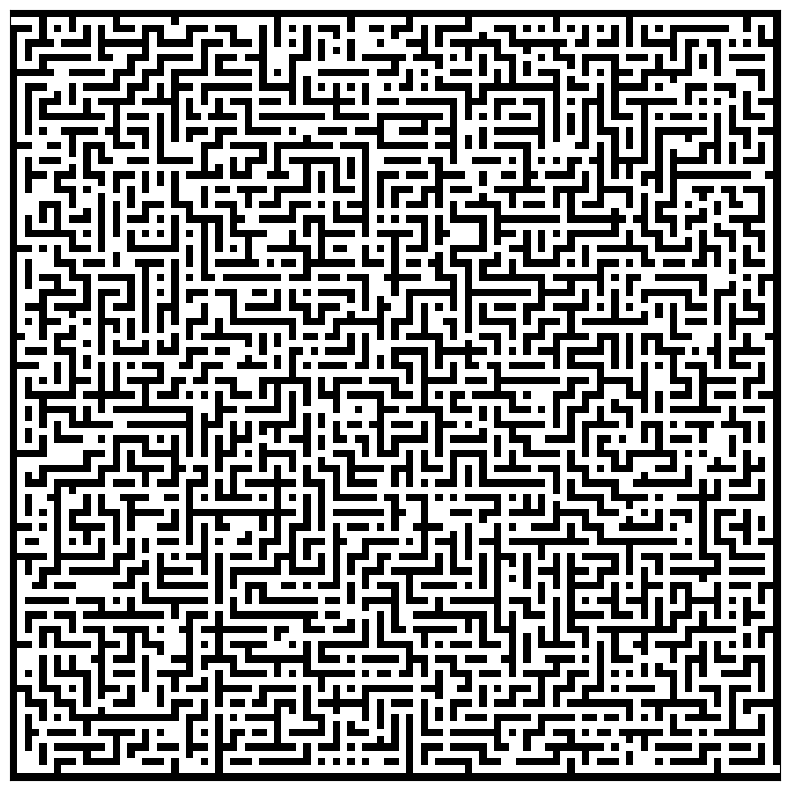

In [3]:
draw_maze(array)

# DFS (Depth-First Search)
Depth-First Search (DFS) is a fundamental algorithm used to traverse or search through structures like graphs and trees, and it can be effectively applied to solve mazes. The core idea behind DFS is to start at a given point—in the case of a maze, typically the entrance—and explore as far as possible along one path before backtracking. This means DFS goes “deep” into one direction until it can’t go further, either because it hits a wall, a visited cell, or reaches the edge of the maze. At that point, it backtracks to the previous step and tries a different direction. This process continues until the algorithm either finds the exit or exhausts all possible paths.

In a maze modeled as a 2D grid, each cell represents a node and the open paths between them are edges. DFS can be implemented recursively or with a stack, and it involves marking each visited cell to avoid revisiting and getting caught in loops. The algorithm explores in one direction (up, down, left, or right), recursively diving into paths until it finds the goal or determines that a dead-end has been reached. Although DFS is not guaranteed to find the shortest path to the exit, it is a relatively simple and memory-efficient approach—especially in recursive form—since it only keeps track of the current path being explored.

There are several advantages to using DFS for solving mazes. It is easy to implement, requires minimal memory, and is often fast when the path to the goal is deep rather than broad. Additionally, it's straightforward to adapt DFS to record the actual path taken to the goal. However, DFS also comes with some limitations. It does not guarantee the shortest path, can spend a lot of time exploring deep dead-ends, and may risk stack overflow in very large or complex mazes if implemented recursively. Also, without careful handling (such as maintaining a visited set), DFS might waste time revisiting the same nodes.

## Implementation

In [4]:
def dfs_maze_solver(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    visited = [[False] * cols for _ in range(rows)]
    path = []

    def in_bounds(x, y):
        return 0 <= x < rows and 0 <= y < cols

    
    def dfs(x, y):
        if not in_bounds(x, y) or maze[x][y] == 1 or visited[x][y]:
            return False

        visited[x][y] = True
        path.append((x, y))

        if (x, y) == goal:
            return True
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            if dfs(x + dx, y + dy):
                return True
        path.pop()
        return False

    if dfs(*start):
        return path  # Successful path
    else:
        return None  # No path found

The function `dfs_maze_solver` takes the maze, the start coordinate, and the goal coordinate as input. It initializes a `visited` matrix of the same size as the maze to keep track of which cells have already been explored, and a path list to store the sequence of cells from the start to the goal.

Inside the function, a helper method `in_bounds` ensures that any cell being accessed is within the maze boundaries. The core of the search is handled by the nested `dfs` function, which performs the recursive depth-first search. It first checks whether the current cell is within bounds, not a wall, and not already visited. If the current cell is the goal or exitpoint, it returns True, indicating that the path has been found. Otherwise, it marks the cell as visited, adds it to the path, and recursively explores the four possible directions (up, down, left, right). If a direction leads to a successful path, the function returns True. If none of the directions work, it backtracks by removing the current cell from the path and continues searching.

In [5]:
start = (1, 1)  # We start in the upper left corner
end = (array.shape[0]-2, array.shape[1]-2)  # The exit is in the lower right corner

recursive_path = dfs_maze_solver(array, start, end)

Of course we can create an iterative DFS. 

In [6]:
def dfs_maze_solver_iterative(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    stack = [(start, [start])]  # stack holds tuples of (current_cell, path_so_far)

    def in_bounds(x, y):
        return 0 <= x < rows and 0 <= y < cols

    while stack:
        (x, y), path = stack.pop()

        if not in_bounds(x, y) or maze[x][y] == 1 or visited[x][y]:
            continue

        visited[x][y] = True

        if (x, y) == goal:
            return path  # Found the goal

        # Explore directions: up, down, left, right
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and not visited[nx][ny] and maze[nx][ny] == 0:
                stack.append(((nx, ny), path + [(nx, ny)]))

    return None

In [7]:
iterative_path = dfs_maze_solver_iterative(array, start, end)

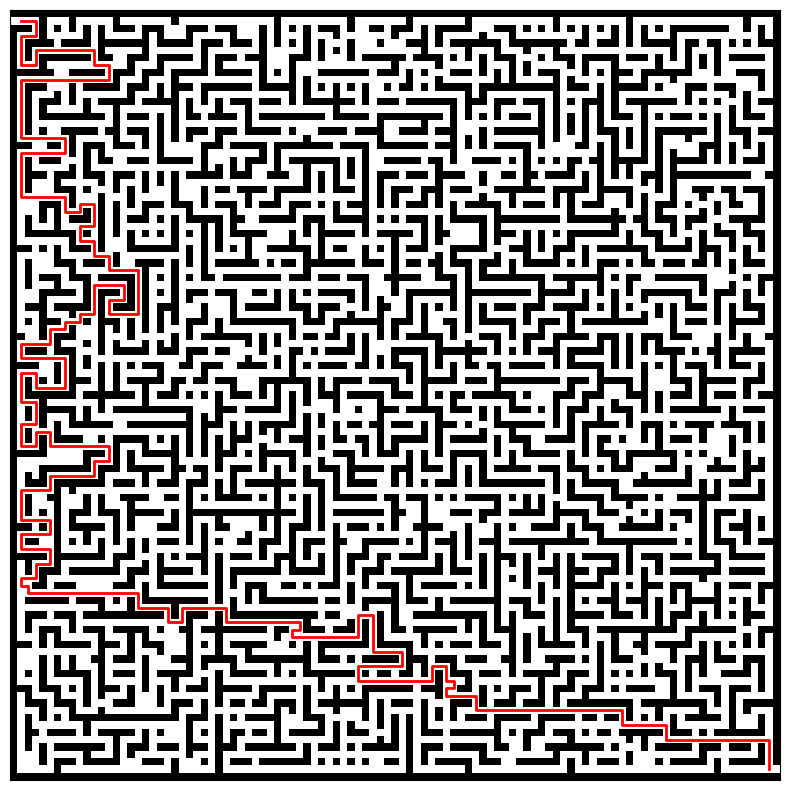

In [8]:
draw_maze(array, path=iterative_path)

In [9]:
print(f'Path-Length: {len(iterative_path)}')

Path-Length: 393


## Conclusion

Depth-First Search (DFS) is a classic and elegant algorithm that works well for exploring paths in mazes. It's particularly valued for its simplicity and efficiency in memory usage. Whether implemented recursively or with a stack, DFS dives deep into one path before trying alternatives, which can quickly lead to a solution in some maze layouts.

However, DFS doesn't always guarantee the shortest path, and it can be inefficient in mazes with many long, misleading branches often going deep into dead-ends before backtracking. In large or complex mazes, a recursive DFS may also run into stack overflow issues, making the iterative version more robust.

**✅ Pros:**
- Simple to implement (recursive or iterative)
- Uses less memory than breadth-first search
- Quickly finds a path in many cases
- Can be modified to record and return the full path

**❌ Cons:**
- Doesn't guarantee the shortest path
- Can waste time exploring deep dead-ends
- Recursive version can hit stack limits in large mazes
- Needs careful handling of visited cells to avoid loops

# BFS (Breadth-First Search)
Breadth-First Search (BFS) is a graph traversal algorithm that is particularly well-suited for solving mazes when the goal is to find the shortest possible path from a starting point to a destination. Unlike Depth-First Search (DFS), which explores one path deeply before trying others, BFS explores all neighboring cells level-by-level. It uses a queue to manage the order of exploration, ensuring that the closest unvisited cells are always processed first. Starting from the entry point, BFS adds each walkable, unvisited neighbor to the queue and marks them as visited to prevent loops. Each cell in the queue is also associated with the path taken to reach it, so when the goal is eventually found, BFS can return the exact sequence of steps from start to finish. The main advantage of BFS is that it always finds the shortest path in an unweighted maze. However, it can be memory-intensive, especially in wide or open mazes, because it needs to track all possible frontiers at each level. Still, BFS is a robust and reliable choice when path optimality is important or when the maze has multiple branching paths that need to be evaluated evenly.

## Implementation

In [10]:
from collections import deque

def bfs_maze_solver(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    queue = deque([(start, [start])])  # queue holds (cell, path_so_far)

    def in_bounds(x, y):
        return 0 <= x < rows and 0 <= y < cols

    while queue:
        (x, y), path = queue.popleft()

        if not in_bounds(x, y) or maze[x][y] == 1 or visited[x][y]:
            continue

        visited[x][y] = True

        if (x, y) == goal:
            return path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and not visited[nx][ny] and maze[nx][ny] == 0:
                queue.append(((nx, ny), path + [(nx, ny)]))

    return None

The BFS maze solver code uses an iterative approach with a queue to explore the maze level by level. The function `bfs_maze_solver` takes three inputs: the maze (a 2D grid where 0 indicates walkable paths and 1 represents walls), a starting coordinate, and a goal coordinate. It initializes a `visited` matrix to keep track of already-explored cells and a queue using deque. Each entry in the queue is a tuple containing the current cell position and the path taken to reach it. The algorithm enters a loop where it dequeues the first item, checks if the current position is within the maze bounds, not a wall, and not previously visited. If it’s valid, the cell is marked as visited. If the current cell is the goal, the function immediately returns the full path. Otherwise, it looks in all four directions (up, down, left, right), and for each unvisited, walkable neighbor, it appends a new tuple to the queue with the neighbor’s position and the updated path. This process continues until either the goal is found—ensuring it’s the shortest path due to BFS’s nature—or the queue is empty, in which case no valid path exists. This implementation guarantees optimal pathfinding and is structured to avoid infinite loops and unnecessary processing.

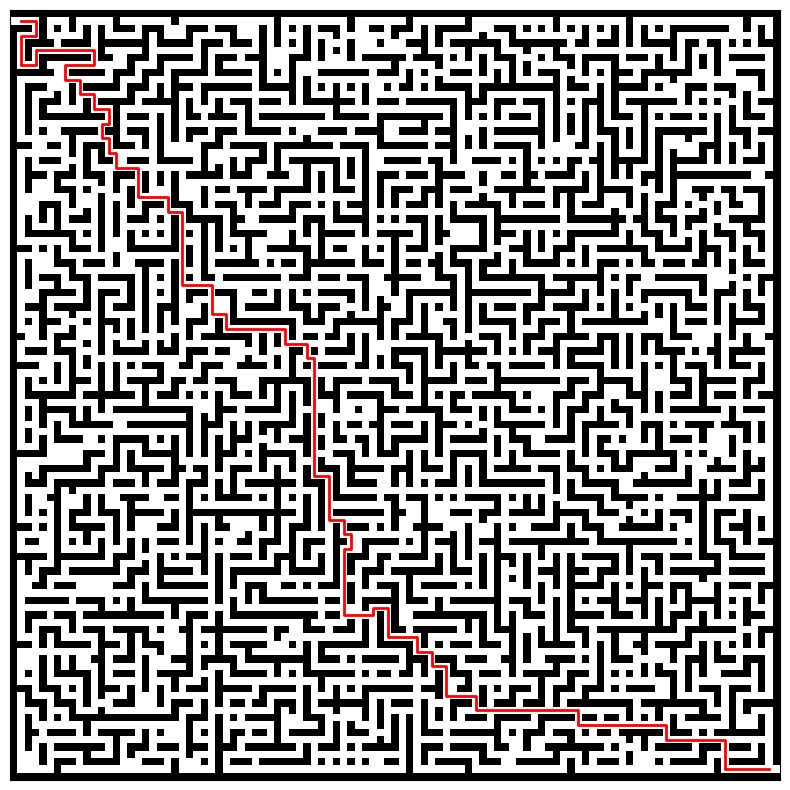

In [11]:
shortest_path = bfs_maze_solver(array, start, end)
draw_maze(array, path=shortest_path)

In [12]:
print(f'Path-Length: {len(shortest_path)}')

Path-Length: 227


Compared to the path-length of the DFS algorithm, the path calculated by the BFS is much more shorter. 

## Conclusion

Breadth-First Search (BFS) is one of the most reliable algorithms when it comes to finding the shortest path in a maze. It systematically explores all possible directions step by step, ensuring that the first time it reaches the goal, it has taken the minimum number of moves. This makes it particularly suitable for mazes where path optimality matters. BFS is also safe for large mazes because it doesn’t rely on recursion and avoids stack overflow issues. It’s deterministic, meaning it always returns the same result for the same maze, which adds to its reliability.

However, BFS does come with some trade-offs. It generally uses more memory than DFS, especially in open or very large mazes, because it needs to store all frontier nodes (i.e., all reachable positions at the current level of depth). It may also take longer than DFS to reach a goal if that goal is buried deep in a narrow path, as BFS explores all paths evenly. Despite this, the guaranteed shortest path and consistent behavior make BFS a strong choice for many practical applications.

**✅ Pros:**
- Always finds the shortest path in unweighted mazes
- Safe for large mazes (no recursion)
- Easy to understand and implement
- Deterministic and reliable

**❌ Cons:**
- Can use a lot of memory for wide/open mazes
- May be slower in deep or sparse mazes
- Slightly more complex data structure (queue with path tracking)

# Dijkstra’s Algorithm
Dijkstra’s algorithm is a well-known and reliable method for finding the shortest path in a graph or maze, especially when different paths have different costs. In the context of a maze, each cell is treated as a node, and movement between walkable cells (usually represented by 0) can have an associated cost. Dijkstra’s algorithm starts at the source cell and assigns it a distance of zero, while all other cells are initialized with an infinite distance. It uses a priority queue to always explore the cell with the currently smallest known cost. For each cell it processes, the algorithm looks at its neighbors and updates their distance if a shorter path through the current cell is found. This process continues until the goal is reached or all reachable paths have been checked. One of the key strengths of Dijkstra’s algorithm is that it guarantees the shortest path, even in mazes with uneven terrain or movement penalties. While it’s more computationally intensive than simpler algorithms like BFS when all movements cost the same, its ability to handle weighted paths makes it ideal for more complex maze scenarios. However, it doesn't support negative weights and may use more memory and processing time compared to unweighted alternatives.

## Implementation

In [13]:
import heapq

def dijkstra_maze_solver(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    distances = [[float('inf')] * cols for _ in range(rows)]
    distances[start[0]][start[1]] = 0
    visited = [[False] * cols for _ in range(rows)]
    heap = [(0, start, [start])]  # (cost, (x, y), path)

    def in_bounds(x, y):
        return 0 <= x < rows and 0 <= y < cols

    while heap:
        cost, (x, y), path = heapq.heappop(heap)

        if visited[x][y]:
            continue
        visited[x][y] = True

        if (x, y) == goal:
            return path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and maze[nx][ny] == 0 and not visited[nx][ny]:
                new_cost = cost + 1 
                if new_cost < distances[nx][ny]:
                    distances[nx][ny] = new_cost
                    heapq.heappush(heap, (new_cost, (nx, ny), path + [(nx, ny)]))

    return None

The Dijkstra maze solver uses a priority queue to ensure that the algorithm always explores the path with the lowest accumulated cost first. It begins by initializing a 2D `distances` grid with infinity values, representing the shortest known distances to each cell, and sets the distance to the start cell as zero. A separate `visited` matrix keeps track of which cells have already been finalized, ensuring that the algorithm doesn't revisit them. The algorithm uses a min-heap (priority queue) to manage which cell to explore next, always choosing the one with the smallest current cost. Each entry in the queue includes the current cost, cell coordinates, and the path taken so far. As the algorithm processes each cell, it checks whether it's the goal and, if not, explores its neighbors in the four cardinal directions. For each valid neighbor (within bounds, walkable, and unvisited), it calculates a new cost and updates the distance if it's lower than any previously recorded cost. The neighbor is then added to the heap for further exploration. This process repeats until the goal is reached, at which point the algorithm returns the shortest path. If no path exists, it returns None. This implementation ensures that the first time the goal is reached, it’s through the most efficient path possible, making Dijkstra’s algorithm ideal for solving mazes with uniform or variable movement costs.

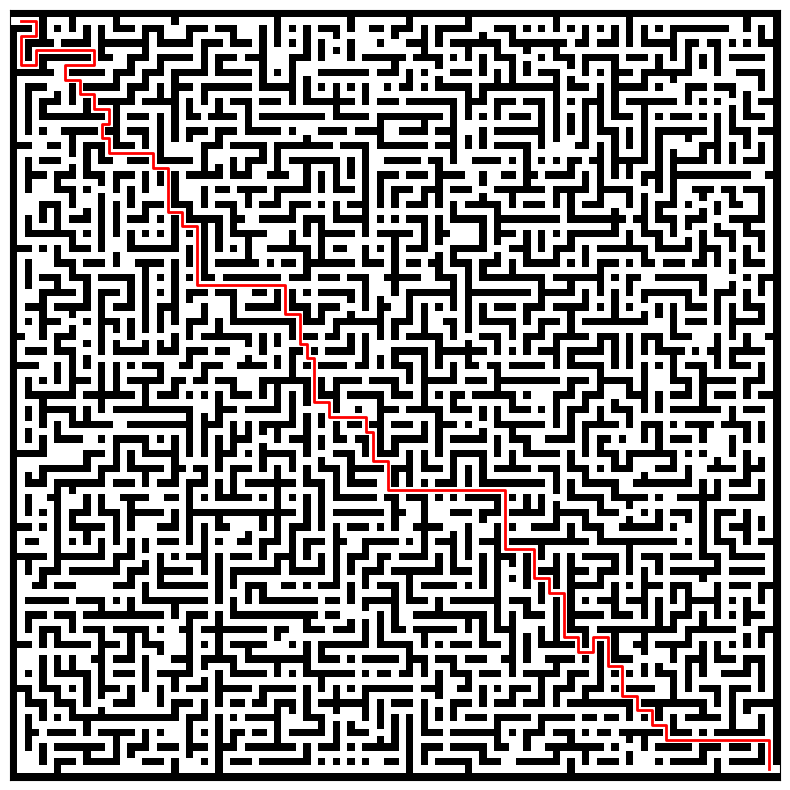

In [14]:
shortest_path = dijkstra_maze_solver(array, start, end)
draw_maze(array, path=shortest_path)

In [15]:
print(f'Path-Length: {len(shortest_path)}')

Path-Length: 227


# Conclusion
Dijkstra’s algorithm is one of the most dependable and precise methods for finding the shortest path in a maze, especially when movement costs can vary. It guarantees that the path it returns is not just any valid path, but the most efficient one based on accumulated cost. While it behaves similarly to Breadth-First Search (BFS) in mazes where all movements cost the same, Dijkstra becomes invaluable when different cells have different traversal costs — such as terrains, penalties, or obstacles that slow down movement.

The algorithm’s use of a priority queue ensures that the lowest-cost paths are always explored first, which is key to its correctness. It’s suitable for complex environments, reliable under a variety of conditions, and well-suited for real-world navigation tasks. However, this precision comes at a price: Dijkstra’s algorithm is more computationally intensive than simpler approaches like DFS or BFS. It can consume more memory and processing time, particularly in large or dense mazes. Moreover, it does not handle negative weights, though that's rarely an issue in physical maze-like settings.

**✅ Pros:**
- Guaranteed shortest path in mazes with uniform or weighted costs
- Handles variable movement costs seamlessly
- No recursion issues, safe for large mazes
- Widely applicable, even beyond mazes (e.g. maps, networks)

**❌ Cons:**
- Slower than BFS in simple unweighted mazes
- Higher memory usage due to distance and queue tracking
- Doesn’t support negative weights
- Overhead can be unnecessary in mazes where all paths have equal cost

# A* (A-Star) Algorithm
The A* (A-star) algorithm is an advanced pathfinding and graph traversal algorithm that builds on the foundation of Dijkstra’s algorithm by incorporating a heuristic function. Like Dijkstra, it calculates the actual cost from the start node to a given node, known as `g(n)`, but it also estimates the cost from that node to the goal using a heuristic, called `h(n)`. The total estimated cost of a path through a node is `f(n) = g(n) + h(n)`, and A* always chooses the next node to explore based on the lowest `f(n)`. This makes the algorithm much more efficient than Dijkstra in many cases, as it actively guides the search toward the goal instead of blindly exploring all options. The heuristic must be admissible, meaning it never overestimates the actual cost to the goal, in order to guarantee that the algorithm still finds the shortest possible path. A common heuristic for grid-based mazes is the Manhattan distance, which measures the total number of horizontal and vertical steps to the goal. A* maintains a priority queue of nodes to explore, updating costs and tracking the path as it progresses. When the goal is reached, the algorithm reconstructs and returns the optimal path. A* is especially effective in scenarios where the search space is large, as it reduces unnecessary exploration by focusing only on the most promising paths. It is widely used in applications such as GPS navigation, game AI, and robotics due to its accuracy, speed, and flexibility in handling different movement costs.

## Implementation

In [16]:
import heapq

def manhattan(a, b):
    """Heuristic: Manhattan distance between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_maze_solver(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (0 + manhattan(start, goal), 0, start, [start]))  # (f, g, cell, path)

    g_scores = [[float('inf')] * cols for _ in range(rows)]
    g_scores[start[0]][start[1]] = 0

    visited = [[False] * cols for _ in range(rows)]

    def in_bounds(x, y):
        return 0 <= x < rows and 0 <= y < cols

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        x, y = current

        if visited[x][y]:
            continue
        visited[x][y] = True

        if current == goal:
            return path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy

            if in_bounds(nx, ny) and maze[nx][ny] == 0:
                tentative_g = g + 1  # uniform cost
                if tentative_g < g_scores[nx][ny]:
                    g_scores[nx][ny] = tentative_g
                    f_score = tentative_g + manhattan((nx, ny), goal)
                    heapq.heappush(open_set, (f_score, tentative_g, (nx, ny), path + [(nx, ny)]))

    return None 


The algorithm begins by defining a heuristic function, `manhattan`, which estimates the distance from any given cell to the goal based on the sum of horizontal and vertical steps—ideal for grid-based movement without diagonals. The main function, `a_star_maze_solver`, initializes a priority queue (min-heap) with the starting cell, combining the actual cost to reach the cell `(g)` and the estimated cost to the goal `(h)` into a total cost `(f = g + h)`. It also creates a 2D list `called g_scores` to track the shortest known distance from the start to each cell, and a `visited` grid to prevent revisiting already processed cells. During each iteration, the algorithm selects the cell with the lowest `f` value from the queue. If that cell is the goal, the path is returned immediately. Otherwise, the algorithm explores all valid neighboring cells (up, down, left, right), calculates a tentative new `g` score for each, and if it’s lower than any previously recorded cost, it updates the score and pushes the neighbor into the queue along with the updated path. This process continues until the goal is reached or the queue is empty, in which case no path exists. By combining actual cost with an intelligent guess, this implementation of A* efficiently finds the optimal path while avoiding unnecessary exploration.

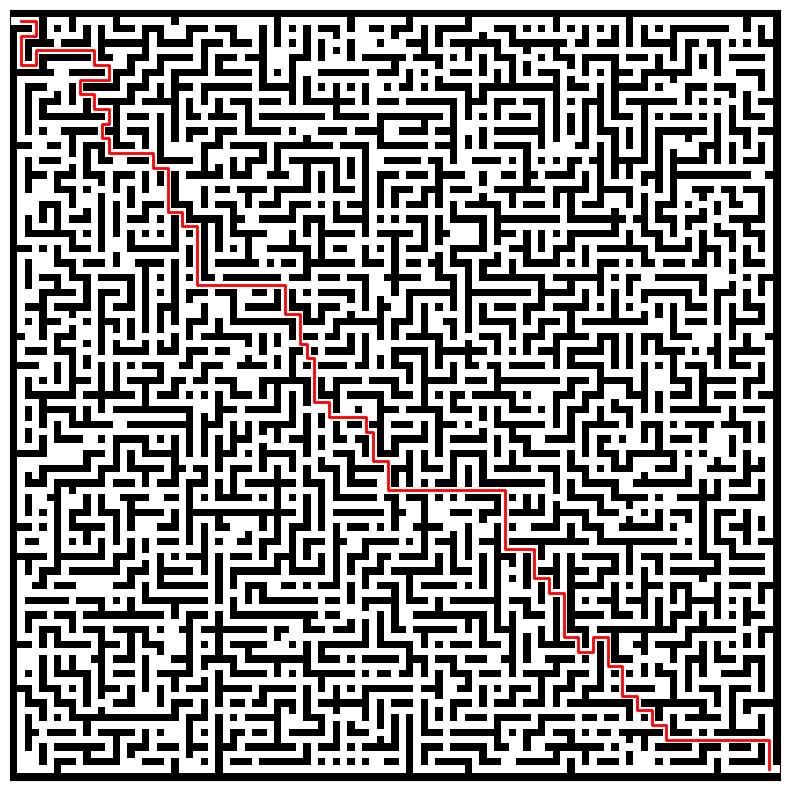

In [17]:
shortest_path = a_star_maze_solver(array, start, end)
draw_maze(array, path=shortest_path)

In [18]:
print(f'Path-Length: {len(shortest_path)}')

Path-Length: 227


## Conclusion
The A* algorithm is one of the most effective and intelligent pathfinding algorithms available. It builds on the reliability of Dijkstra’s algorithm by introducing a heuristic that helps guide the search toward the goal, making it faster and more efficient in most practical cases. A* doesn’t just blindly explore every possible path; instead, it balances the cost of reaching a cell with an estimate of how close that cell is to the target. This makes A* particularly powerful in large mazes or maps, where an uninformed search could waste time exploring irrelevant areas. As long as the heuristic used is admissible (i.e., it never overestimates the actual cost to the goal), A* guarantees that the path it finds is the shortest possible. It is the go-to algorithm in many real-world applications, from GPS navigation systems and robotics to video game AI.

**✅ Pros:**
- Guaranteed shortest path (if heuristic is admissible)
- Faster than Dijkstra in most cases due to heuristic guidance
- Highly flexible — works with weighted, unweighted, or complex maps
- Widely used in real-world and AI-based applications
- Smart exploration — focuses search near the goal

**❌ Cons:**
- More complex to implement than BFS or DFS
- Higher memory usage due to open set and score tracking
- Performance depends on the quality of the heuristic
- Can be slower than simpler methods in small or trivial mazes

# Solve the Hardest Maze

In [19]:
hard_maze = np.loadtxt('/kaggle/input/maze-dataset/imperfect_maze/maze1000_dim83.txt', dtype=int)
hard_maze_start = (1, 1) 
hard_maze_end = (hard_maze.shape[0]-2, hard_maze.shape[1]-2)

dfs_path = dfs_maze_solver_iterative(hard_maze, hard_maze_start, hard_maze_end)
bfs_path = bfs_maze_solver(hard_maze, hard_maze_start, hard_maze_end)
dijkstra_path = dijkstra_maze_solver(hard_maze, hard_maze_start, hard_maze_end)
astar_path = a_star_maze_solver(hard_maze, hard_maze_start, hard_maze_end)

In [20]:
def draw_maze_subplot(ax, maze, path, title, path_color):
    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')
    
    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [x[0] for x in path]
        ax.plot(x_coords, y_coords, color=path_color, linewidth=2)
    
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Entry and exit arrows
    ax.arrow(0, 1, .4, 0, fc='green', ec='green', head_width=0.3, head_length=0.3)
    ax.arrow(maze.shape[1] - 1, maze.shape[0] - 2, 0.4, 0, fc='blue', ec='blue', head_width=0.3, head_length=0.3)


def compare_algorithms(maze, dfs_path, bfs_path, dijkstra_path, astar_path):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('Comparison of Shortest Path Algorithms', fontsize=16)
    
    draw_maze_subplot(axs[0, 0], maze, dfs_path, 'DFS', 'red')
    draw_maze_subplot(axs[0, 1], maze, bfs_path, 'BFS', 'orange')
    draw_maze_subplot(axs[1, 0], maze, dijkstra_path, 'Dijkstra', 'blue')
    draw_maze_subplot(axs[1, 1], maze, astar_path, 'A* Search', 'purple')
    
    plt.subplots_adjust(hspace=0.15, top=0.92)
    plt.show()


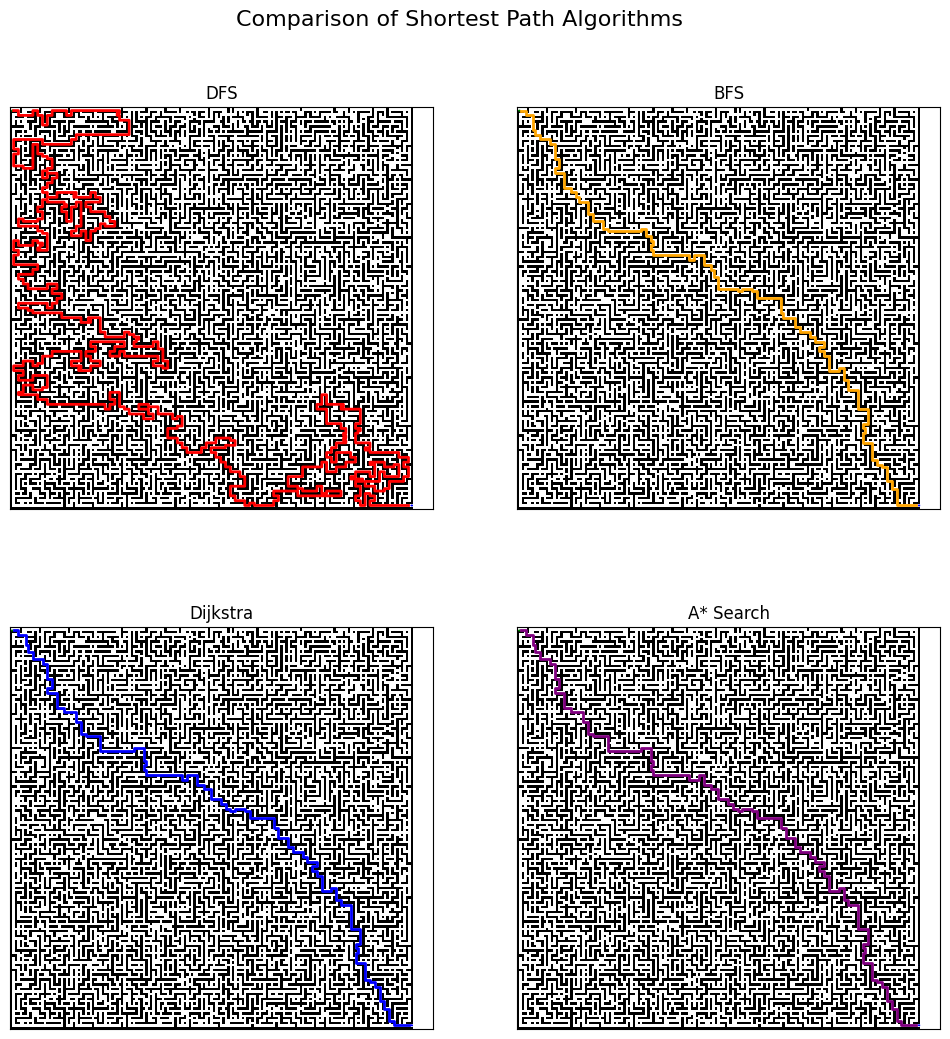

In [21]:
compare_algorithms(hard_maze, dfs_path, bfs_path, dijkstra_path, astar_path)

# Final Words
In this notebook, we explored four fundamental pathfinding algorithms - DFS, BFS, Dijkstra, and A-Star - to solve the problem of finding the shortest path in a maze with dimensions smaller than 150x150. Each algorithm has its strengths and ideal use cases, which became evident through this comparative analysis. DFS, while simple and memory-efficient, is not suitable for finding the shortest path, especially in large or complex mazes, as it explores deeply and can easily get trapped in suboptimal branches. BFS, on the other hand, is excellent for unweighted mazes where all moves have equal cost, as it guarantees the shortest path and performs reliably in smaller grids. Dijkstra’s algorithm is a robust choice when dealing with weighted mazes, as it accounts for varying movement costs, though it tends to be slower than BFS in uniform-cost scenarios due to its lack of heuristic guidance. A-Star, which builds upon Dijkstra by adding a heuristic, offers the best of both worlds: it maintains optimality while significantly improving performance by focusing the search in the direction of the goal. For small mazes like those used in this notebook, BFS is often the most efficient for unweighted problems, while A-Star is ideal when performance matters and especially when dealing with weighted or more complex environments. Dijkstra remains a solid fallback for any weighted case where heuristic design is difficult, and DFS, although educational, is best reserved for simple use cases where finding any path is sufficient.

# Thank you for reading this notebook 
I appreciate your time and interest. If you found it helpful or insightful, feel free to build upon it, share it, or reach out with questions or ideas. Happy coding!